In [1]:
import fundamentalanalysis as fa
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from fanett import db_fundamentals_summary, download_stocks_fundamentals

api_key1 = "524132a6aa8f6bd0e848e2a03a215c48"
api_key2 = "2ce342c41d2dffffdf5d51fc185fa8b6"
api_key3 = "41cacf0260e68faa1f0e143fac6872d9"

nasdaq_tickers = ['TMUSR', 'AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'INTC', 'NVDA', 'ADBE',
               'PYPL', 'CSCO', 'NFLX', 'PEP', 'TSLA', 'CMCSA', 'AMGN', 'COST', 'TMUS', 'AVGO',
               'TXN', 'CHTR', 'QCOM', 'GILD', 'SBUX', 'INTU', 'VRTX', 'MDLZ', 'ISRG', 'FISV',
               'BKNG', 'ADP', '', 'ATVI', 'AMD', 'JD', 'MU', 'AMAT', 'ILMN', 'ADSK',
               'CSX', 'MELI', 'LRCX', 'ADI', 'ZM', 'BIIB', 'EA', 'KHC', 'WBA', 'LULU',
               'EBAY', 'MNST', 'DXCM', 'EXC', 'BIDU', 'XEL', 'WDAY', 'DOCU', 'SPLK', 'ORLY',
               'NXPI', 'CTSH', 'KLAC', 'SNPS', 'SGEN', 'ASML', 'IDXX', 'CSGP', 'CTAS', 'VRSK',
               'MAR', 'CDNS', 'PAYX', 'ALXN', 'MCHP', 'SIRI', 'ANSS', 'VRSN', 'FAST', 'BMRN',
               'XLNX', 'INCY','DLTR', 'SWKS', 'ALGN', 'CERN', 'CPRT', 'CTXS', 'TTWO', 'MXIM',
               'CDW', 'CHKP', 'WDC', 'ULTA', 'NTAP', 'FOXA', 'LBTYK']

euronext_tickers = pd.read_excel('euronext_symbols.xlsx').values.flatten()
    
    

FileNotFoundError: [Errno 2] No such file or directory: 'euronext_symbols.xlsx'

In [11]:
download_stocks_fundamentals(euronext_tickers[0:124],'euronext_0_120', api_key1)

100%|██████████| 124/124 [02:00<00:00,  1.02it/s]


In [6]:
download_stocks_fundamentals(nasdaq_tickers[0:20], 'nasdaq_annual', api_key3)

100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


In [2]:
nasdaq_data = np.load("nasdaq_annual.npy", allow_pickle = True).item()
nasdaq_2021 = db_fundamentals_summary(nasdaq_tickers, nasdaq_data, year = '2021')
nasdaq_2021.head()

,assetTurnover,averageInventory,averagePayables,averageReceivables,bookValuePerShare,capexPerShare,capexToDepreciation,capexToOperatingCashFlow,capexToRevenue,capitalExpenditureCoverageRatio,cashConversionCycle,cashFlowCoverageRatios,cashFlowToDebtRatio,cashPerShare,cashRatio,companyEquityMultiplier,currentRatio,daysOfInventoryOnHand,daysOfInventoryOutstanding,daysOfPayablesOutstanding,daysOfSalesOutstanding,daysPayablesOutstanding,daysSalesOutstanding,debtEquityRatio,debtRatio,debtToAssets,debtToEquity,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,dividendYield,earningsYield,ebitPerRevenue,ebtPerEbit,effectiveTaxRate,enterpriseValue,enterpriseValueMultiple,enterpriseValueOverEBITDA,evToFreeCashFlow,evToOperatingCashFlow,evToSales,...,operatingCashFlowPerShare,operatingCashFlowSalesRatio,operatingCycle,operatingProfitMargin,payablesTurnover,payoutRatio,pbRatio,peRatio,pfcfRatio,pocfratio,pretaxProfitMargin,priceBookValueRatio,priceCashFlowRatio,priceEarningsRatio,priceEarningsToGrowthRatio,priceFairValue,priceSalesRatio,priceToBookRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceToSalesRatio,ptbRatio,quickRatio,receivablesTurnover,researchAndDdevelopementToRevenue,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,returnOnTangibleAssets,revenuePerShare,roe,roic,salesGeneralAndAdministrativeToRevenue,shareholdersEquityPerShare,shortTermCoverageRatios,stockBasedCompensationToRevenue,tangibleAssetValue,tangibleBookValuePerShare,totalDebtToCapitalization,workingCapital
AAPL,1.042208,6.580000e+09,5.476300e+10,5.150600e+10,3.777557,-0.663722,-0.982364,-0.106548,-0.030302,-9.385476,-31.183510,0.834179,0.834179,3.750553,0.278449,5.563512,1.074553,11.276593,11.276593,93.851071,51.390969,93.851071,51.390969,4.563512,0.820257,0.820257,1.729371,30.762271,0.152799,0.005828,0.038139,0.297824,1.002368,0.133023,2.572256e+12,20.889554,20.889554,27.672652,24.724198,7.031538,...,6.229346,0.284399,62.667561,0.297824,3.889140,0.152799,39.348186,26.219656,26.706799,23.861253,0.298529,39.348186,23.861253,26.219656,0.367742,39.348186,6.786117,39.348186,26.706799,23.861253,6.786117,39.348186,0.909660,7.102415,0.059904,0.269742,0.483099,1.500713,0.269742,21.903541,1.500713,0.483099,0.000000,3.777557,6.663550,0.021612,NaN,3.777557,0.664074,9.355000e+09
MSFT,0.503591,2.636000e+09,1.516300e+10,3.804300e+10,18.813833,-2.732476,-1.764676,-0.268726,-0.122686,-3.721269,-4.929669,1.132276,1.132276,17.269644,0.160439,2.350755,2.079994,18.420509,18.420509,105.959852,82.609675,105.959852,82.609675,1.350755,0.574605,0.574605,0.420479,-18.712509,0.269638,0.007683,0.028495,0.415949,1.016963,0.138266,2.203767e+12,25.885860,25.885860,39.270231,28.717316,13.110792,...,10.168279,0.456547,101.030183,0.415949,3.444701,0.269638,15.143645,35.093532,38.315973,28.019492,0.423005,15.143645,28.019492,35.093532,0.888019,15.143645,12.792203,15.143645,38.315973,28.019492,12.792203,15.143645,1.899196,4.418369,0.123245,0.183568,0.285229,0.431522,0.221781,22.272161,0.431522,0.285229,0.030383,18.813833,9.506938,0.036398,8.447700e+10,11.193454,0.323103,9.574900e+10
AMZN,1.117164,2.821750e+10,7.560150e+10,2.871650e+10,13.660573,-6.032905,-1.780178,-1.317871,-0.129949,-0.758800,-16.079204,NaN,0.398015,9.491008,0.254594,3.042056,1.135760,29.525138,29.525138,71.157031,25.552688,71.157031,25.552688,2.042056,0.671275,0.671275,0.841947,NaN,NaN,NaN,0.022898,0.052954,1.533462,0.125580,1.537232e+12,20.700678,20.700678,-104.388994,33.182212,3.271946,...,4.577767,0.098605,55.077826,0.052954,5.129500,0.000000,10.539675,43.671542,-98.944542,31.451580,0.081203,10.539675,31.451580,43.671542,0.756835,10.539675,3.101297,10.539675,-98.944542,31.451580,3.101297,10.539675,0.906330,14.284211,0.119305,0.079334,0.089402,0.241340,0.083395,46.425099,0.241340,0.089402,0.018779,13.660573,NaN,0.027153,1.177670e+11,11.637055,NaN,1.931400e+10
FB,0.710471,NaN,2.707000e+09,1.268700e+10,44.377754,-6.598081,-2.330488,-0.321880,-0.157442,-3.106749,-22.347729,4.157933,4.157933,17.056859,0.785

In [ ]:
drop les features > 0.95

In [ ]:
def find_optimal_alpha()

In [ ]:
creer ML model pr xchaque cluster 
https://towardsdatascience.com/implementation-of-technical-indicators-into-a-machine-learning-framework-for-quantitative-trading-44a05be8e06
    

In [13]:
http://www.sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/#:~:text=In%20layman's%20terms%2C%20we%20find,and%20select%20that%20as%20epsilon.
pr trouver epsilon optimal

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# scale data first
X = StandardScaler().fit_transform(data2021.values)

db = DBSCAN(eps=10, min_samples=10).fit(X)
labels = db.labels_

pd.Series(labels).value_counts()



 0    77
-1    17
dtype: int64

In [ ]:
choisir la contamination en fonction du ratio de sharpe jugé comme anormal 

In [4]:
download_stocks_annual_info(euronext_tickers[120:240], 'euronext_120_240', api_key=api_key2)

100%|██████████| 120/120 [01:55<00:00,  1.04it/s]


In [5]:
#load data and remove variables that have too much missing values
data2021 = df_key_data_y(nasdaq_tickers, nasdaq_fin, nasdaq_met, year = '2021')
transpdata = data2021.transpose()
data2021 = transpdata.dropna(thresh=len(transpdata.columns)*0.95).transpose().fillna(0)
data2021

,assetTurnover,capitalExpenditureCoverageRatio,cashConversionCycle,cashFlowToDebtRatio,cashPerShare,cashRatio,companyEquityMultiplier,currentRatio,daysOfInventoryOutstanding,daysOfPayablesOutstanding,daysOfSalesOutstanding,debtEquityRatio,debtRatio,ebitPerRevenue,ebtPerEbit,effectiveTaxRate,enterpriseValueMultiple,fixedAssetTurnover,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,grossProfitMargin,longTermDebtToCapitalization,netIncomePerEBT,netProfitMargin,operatingCashFlowPerShare,operatingCashFlowSalesRatio,operatingCycle,operatingProfitMargin,payablesTurnover,payoutRatio,pretaxProfitMargin,priceBookValueRatio,priceCashFlowRatio,priceEarningsRatio,priceEarningsToGrowthRatio,priceFairValue,priceSalesRatio,priceToBookRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,...,capexToOperatingCashFlow,capexToRevenue,daysOfInventoryOnHand,daysPayablesOutstanding,daysSalesOutstanding,debtToAssets,debtToEquity,earningsYield,enterpriseValue,enterpriseValueOverEBITDA,evToFreeCashFlow,evToOperatingCashFlow,evToSales,freeCashFlowYield,grahamNetNet,grahamNumber,incomeQuality,intangiblesToTotalAssets,interestDebtPerShare,investedCapital,marketCap,netCurrentAssetValue,netDebtToEBITDA,netIncomePerShare,pbRatio,peRatio,pfcfRatio,pocfratio,ptbRatio,researchAndDdevelopementToRevenue,returnOnTangibleAssets,revenuePerShare,roe,roic,salesGeneralAndAdministrativeToRevenue,shareholdersEquityPerShare,stockBasedCompensationToRevenue,tangibleAssetValue,tangibleBookValuePerShare,workingCapital
AAPL,1.042208,-9.385476,-31.183510,0.834179,3.750553,0.278449,5.563512,1.074553,11.276593,93.851071,51.390969,4.563512,0.820257,0.297824,1.002368,0.133023,20.889554,9.275279,0.893452,5.565624,0.417794,0.633615,0.866977,0.258818,6.229346,0.284399,62.667561,0.297824,3.889140,0.152799,0.298529,39.348186,23.861253,26.219656,0.367742,39.348186,6.786117,39.348186,26.706799,23.861253,...,-0.106548,-0.030302,11.276593,93.851071,51.390969,0.820257,1.729371,0.038139,2.572256e+12,20.889554,27.672652,24.724198,7.031538,0.037444,-10.978415,21.950838,1.098838,0.000000,7.626006,1.976843,2.482477e+12,-1.530760e+11,0.729104,5.669029,39.348186,26.219656,26.706799,23.861253,39.348186,0.059904,0.269742,21.903541,1.500713,0.483099,0.000000,3.777557,0.021612,0.000000e+00,3.777557,9.355000e+09
MSFT,0.503591,-3.721269,-4.929669,1.132276,17.269644,0.160439,2.350755,2.079994,18.420509,105.959852,82.609675,1.350755,0.574605,0.415949,1.016963,0.138266,25.885860,2.374024,0.731274,7.435802,0.689258,0.296012,0.861734,0.364517,10.168279,0.456547,101.030183,0.415949,3.444701,0.269638,0.423005,15.143645,28.019492,35.093532,0.888019,15.143645,12.792203,15.143645,38.315973,28.019492,...,-0.268726,-0.122686,18.420509,105.959852,82.609675,0.574605,0.420479,0.028495,2.203767e+12,25.885860,39.270231,28.717316,13.110792,0.026099,-4.187989,58.623294,1.252469,0.172303,9.291242,0.477329,2.150216e+12,-7.385000e+09,0.629020,8.118590,15.143645,35.093532,38.315973,28.019492,15.143645,0.123245,0.221781,22.272161,0.431522,0.285229,0.030383,18.813833,0.036398,8.447700e+10,11.193454,9.574900e+10
AMZN,1.117164,-0.758800,-16.079204,0.398015,9.491008,0.254594,3.042056,1.135760,29.525138,71.157031,25.552688,2.042056,0.671275,0.052954,1.533462,0.125580,20.700678,2.171453,-0.317871,-1.455138,0.141149,0.457096,0.874525,0.071014,4.577767,0.098605,55.077826,0.052954,5.129500,0.000000,0.081203,10.539675,31.451580,43.671542,0.756835,10.539675,3.101297,10.539675,-98.944542,31.451580,...,-1.317871,-0.129949,29.525138,71.157031,25.552688,0.671275,0.841947,0.022898,1.537232e+12,20.700678,-104.388994,33.182212,3.271946,-0.010107,-14.354422,31.832776,1.388533,0.048693,11.680237,0.841947,1.457057e+12,-1.207240e+11,1.079653,3.296838,10.539675,43.671542,-98.944542,31.451580,10.539675,0.119305,0.083395,46.425099,0.241340,0.089402,0.018779,13.660573,0.027153,1.177670e+11,11.637055,1.931400e+10
FB,0.710471,-3.106749,-22.347729,4.157933,17.056859,0.785474,1.329183,3.154294,0.000000,65.799594,43.451865,0.329183,0.247658,

In [30]:
clf = IsolationForest(contamination='auto')
#identify outliers:
y_pred_train = clf.fit_predict(data2021)
#Remove outliers where 1 represent inliers and -1 represent outliers:
X_train_cleaned = data2021[np.where(y_pred_train == 1, True, False)]
X_train_cleaned

,assetTurnover,capitalExpenditureCoverageRatio,cashConversionCycle,cashFlowToDebtRatio,cashPerShare,cashRatio,companyEquityMultiplier,currentRatio,daysOfInventoryOutstanding,daysOfPayablesOutstanding,daysOfSalesOutstanding,debtEquityRatio,debtRatio,ebitPerRevenue,ebtPerEbit,effectiveTaxRate,enterpriseValueMultiple,fixedAssetTurnover,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,grossProfitMargin,longTermDebtToCapitalization,netIncomePerEBT,netProfitMargin,operatingCashFlowPerShare,operatingCashFlowSalesRatio,operatingCycle,operatingProfitMargin,payablesTurnover,payoutRatio,pretaxProfitMargin,priceBookValueRatio,priceCashFlowRatio,priceEarningsRatio,priceEarningsToGrowthRatio,priceFairValue,priceSalesRatio,priceToBookRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,...,capexToOperatingCashFlow,capexToRevenue,daysOfInventoryOnHand,daysPayablesOutstanding,daysSalesOutstanding,debtToAssets,debtToEquity,earningsYield,enterpriseValue,enterpriseValueOverEBITDA,evToFreeCashFlow,evToOperatingCashFlow,evToSales,freeCashFlowYield,grahamNetNet,grahamNumber,incomeQuality,intangiblesToTotalAssets,interestDebtPerShare,investedCapital,marketCap,netCurrentAssetValue,netDebtToEBITDA,netIncomePerShare,pbRatio,peRatio,pfcfRatio,pocfratio,ptbRatio,researchAndDdevelopementToRevenue,returnOnTangibleAssets,revenuePerShare,roe,roic,salesGeneralAndAdministrativeToRevenue,shareholdersEquityPerShare,stockBasedCompensationToRevenue,tangibleAssetValue,tangibleBookValuePerShare,workingCapital
AAPL,1.042208,-9.385476,-31.183510,0.834179,3.750553,0.278449,5.563512,1.074553,11.276593,93.851071,51.390969,4.563512,0.820257,0.297824,1.002368,0.133023,20.889554,9.275279,0.893452,5.565624,0.417794,0.633615,0.866977,0.258818,6.229346,0.284399,62.667561,0.297824,3.889140,0.152799,0.298529,39.348186,23.861253,26.219656,0.367742,39.348186,6.786117,39.348186,26.706799,23.861253,...,-0.106548,-0.030302,11.276593,93.851071,51.390969,0.820257,1.729371,0.038139,2.572256e+12,20.889554,27.672652,24.724198,7.031538,0.037444,-10.978415,21.950838,1.098838,0.000000,7.626006,1.976843,2.482477e+12,-1.530760e+11,0.729104,5.669029,39.348186,26.219656,26.706799,23.861253,39.348186,0.059904,0.269742,21.903541,1.500713,0.483099,0.000000,3.777557,0.021612,0.000000e+00,3.777557,9.355000e+09
MSFT,0.503591,-3.721269,-4.929669,1.132276,17.269644,0.160439,2.350755,2.079994,18.420509,105.959852,82.609675,1.350755,0.574605,0.415949,1.016963,0.138266,25.885860,2.374024,0.731274,7.435802,0.689258,0.296012,0.861734,0.364517,10.168279,0.456547,101.030183,0.415949,3.444701,0.269638,0.423005,15.143645,28.019492,35.093532,0.888019,15.143645,12.792203,15.143645,38.315973,28.019492,...,-0.268726,-0.122686,18.420509,105.959852,82.609675,0.574605,0.420479,0.028495,2.203767e+12,25.885860,39.270231,28.717316,13.110792,0.026099,-4.187989,58.623294,1.252469,0.172303,9.291242,0.477329,2.150216e+12,-7.385000e+09,0.629020,8.118590,15.143645,35.093532,38.315973,28.019492,15.143645,0.123245,0.221781,22.272161,0.431522,0.285229,0.030383,18.813833,0.036398,8.447700e+10,11.193454,9.574900e+10
AMZN,1.117164,-0.758800,-16.079204,0.398015,9.491008,0.254594,3.042056,1.135760,29.525138,71.157031,25.552688,2.042056,0.671275,0.052954,1.533462,0.125580,20.700678,2.171453,-0.317871,-1.455138,0.141149,0.457096,0.874525,0.071014,4.577767,0.098605,55.077826,0.052954,5.129500,0.000000,0.081203,10.539675,31.451580,43.671542,0.756835,10.539675,3.101297,10.539675,-98.944542,31.451580,...,-1.317871,-0.129949,29.525138,71.157031,25.552688,0.671275,0.841947,0.022898,1.537232e+12,20.700678,-104.388994,33.182212,3.271946,-0.010107,-14.354422,31.832776,1.388533,0.048693,11.680237,0.841947,1.457057e+12,-1.207240e+11,1.079653,3.296838,10.539675,43.671542,-98.944542,31.451580,10.539675,0.119305,0.083395,46.425099,0.241340,0.089402,0.018779,13.660573,0.027153,1.177670e+11,11.637055,1.931400e+10
FB,0.710471,-3.106749,-22.347729,4.157933,17.056859,0.785474,1.329183,3.154294,0.000000,65.799594,43.451865,0.329183,0.247658,

In [20]:
outliers = data2021[np.where(y_pred_train == -1, True, False)]
outliers

,assetTurnover,capitalExpenditureCoverageRatio,cashConversionCycle,cashFlowToDebtRatio,cashPerShare,cashRatio,companyEquityMultiplier,currentRatio,daysOfInventoryOutstanding,daysOfPayablesOutstanding,daysOfSalesOutstanding,debtEquityRatio,debtRatio,ebitPerRevenue,ebtPerEbit,effectiveTaxRate,enterpriseValueMultiple,fixedAssetTurnover,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,grossProfitMargin,longTermDebtToCapitalization,netIncomePerEBT,netProfitMargin,operatingCashFlowPerShare,operatingCashFlowSalesRatio,operatingCycle,operatingProfitMargin,payablesTurnover,payoutRatio,pretaxProfitMargin,priceBookValueRatio,priceCashFlowRatio,priceEarningsRatio,priceEarningsToGrowthRatio,priceFairValue,priceSalesRatio,priceToBookRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,...,debtToEquity,earningsYield,enterpriseValue,enterpriseValueOverEBITDA,evToFreeCashFlow,evToOperatingCashFlow,evToSales,freeCashFlowPerShare,freeCashFlowYield,grahamNetNet,grahamNumber,incomeQuality,intangiblesToTotalAssets,interestDebtPerShare,investedCapital,marketCap,netCurrentAssetValue,netDebtToEBITDA,netIncomePerShare,operatingCashFlowPerShare,payablesTurnover,payoutRatio,pbRatio,peRatio,pfcfRatio,pocfratio,priceToSalesRatio,ptbRatio,receivablesTurnover,researchAndDdevelopementToRevenue,returnOnTangibleAssets,revenuePerShare,roe,roic,salesGeneralAndAdministrativeToRevenue,shareholdersEquityPerShare,stockBasedCompensationToRevenue,tangibleAssetValue,tangibleBookValuePerShare,workingCapital
JD,1.916575,0.000000,-22.118137,1.239080,122.662120,0.319292,2.376635,1.352092,33.548486,62.340560,6.673937,1.201151,0.505400,0.004352,-0.623227,-0.731003,-1413.493606,16.197653,1.000000,27.997331,0.135632,0.099590,1.379271,-0.003741,27.997331,0.044453,40.222424,0.004352,5.854936,0.0,-0.002712,3.284728,16.222152,-192.782027,1.798262,3.284728,0.721126,3.284728,16.222152,16.222152,...,0.110605,-0.005187,6.495908e+11,-1413.493606,15.356286,15.356286,0.682636,27.997331,0.061644,-9.764585,85.611749,-11.883875,0.065654,23.398385,0.163415,6.862180e+11,4.873712e+10,79.700022,-2.355909,27.997331,5.854936,0.0,3.284728,-192.782027,16.222152,16.222152,0.721126,3.284728,54.690355,0.017163,-0.007673,629.816215,-0.017039,0.015065,0.07421,138.269264,0.000000,2.129747e+11,140.958393,7.803607e+10
BIDU,0.327584,-1.790214,-183.006402,0.219896,522.387237,0.494711,1.797199,2.863750,8.382390,234.865815,43.477023,0.738119,0.410705,0.084487,1.024720,0.295695,9.786973,3.547618,0.441407,25.763597,0.483393,0.259154,0.948785,0.082141,58.366933,0.161632,51.859412,0.084487,1.554079,0.0,0.086575,1.564754,16.443754,32.356857,-0.564505,1.564754,2.657830,1.564754,37.253009,16.443754,...,0.349808,0.030905,3.855382e+11,9.786973,43.406690,19.160035,3.096867,25.763597,0.026843,104.050036,639.812861,1.967729,0.111840,275.353154,0.432741,3.308812e+11,5.723300e+10,1.387480,29.662074,58.366933,1.554079,0.0,1.564754,32.356857,37.253009,16.443754,2.657830,1.564754,8.395239,0.200316,0.030296,361.110950,0.048359,0.034424,0.00000,613.369108,0.056678,1.814490e+11,526.320522,1.388270e+11
ORLY,1.137290,-7.242381,-47.820866,0.546710,5.278000,0.061640,-176.425440,0.766733,213.318347,271.701610,10.562397,-177.425440,1.005668,0.218882,0.953635,0.221872,15.255488,2.150997,0.861924,40.293508,0.526724,1.012160,0.778128,0.162422,46.748338,0.240652,223.880744,0.218882,1.343385,0.0,0.208734,-664.688740,13.765623,20.395864,0.619853,-664.688740,3.312730,-664.688740,15.970811,13.765623,...,-83.235250,0.049030,4.965507e+10,15.255488,17.961963,15.481844,3.725743,40.293508,0.062614,-135.415258,26.216403,1.481652,0.075037,87.618572,-88.321319,4.415062e+10,-7.280868e+09,1.691129,31.551495,46.748338,1.343385,0.0,-664.688740,20.395864,15.970811,13.765623,3.312730,-664.688740,34.556550,0.000000,0.199706,194.256690,-32.589389,0.499165,0.00000,-0.968152,0.001850,-9.457630e+08,-13.785025,-1.370353e+09


ValueError: not enough values to unpack (expected 2, got 0)

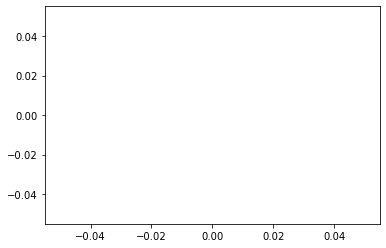

In [43]:
fig, axs = plt.subplots(2, 1, figsize=(22, 12), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(data2021.columns):
    isolation_forest = IsolationForest(contamination=0.01)
    isolation_forest.fit(data2021[column].values.reshape(-1,1))

    xx = np.linspace(data2021[column].min(), data2021[column].max(), len(data2021)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In [39]:
data2021[(data2021['cashConversionCycle'] < 200)].shape[0] / data2021.shape[0]

0.9468085106382979

In [ ]:
data2021[(data2021['cashConversionCycle'] > 2)].shape[0] / data2021.shape[0]

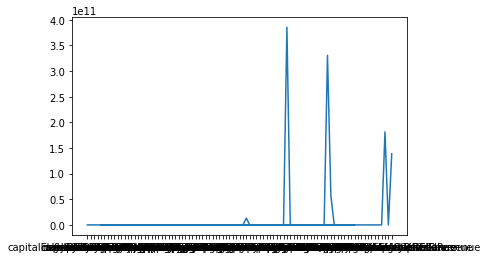

In [22]:



plt.plot(outliers.iloc[1,:])

In [ ]:
garder outliers, voir ses caractéristiques par rapport a la moyenne et faire le PCA sans
normaliser données avant d'utiliser local outlier, tester plusieurs normalisations bdont robust scaler

Do you have a tight, clean, and uniform dataset? Then a LOF value of 1.05 could be an outlier.

Do you have a sparse dataset, varying in density, with many local fluctuations specific to that local cluster? Then a LOF value of 2 could still be an inlier.

umap PCA

utiliser IQR score

https://www.kaggle.com/code/javigallego/massive-pca-outlier-detection-tutorial
DBSCAN

https://arxiv.org/pdf/1902.00567.pdf

lof = LocalOutlierFactor(n_neighbors=n_neighbors, p=p, contamination=contamination)
y_pred_train = lof.fit_predict(data_scaled)

http://shdl.mmu.edu.my/9805/ => identifier les sur performers de chaque secteurs (court terme aussi peut etre avec indicateurs)
enlever var qui contribuent peu au axes conservés

bien re reflexchir a ma strategie mais peut aussi creer des labels outliers en detectnat les bonnes performances passees (surperformeurs) et avec LOF predire les meilleurs opportuniés futures sur les indicateurs

pr calculer les sharpe, a ajouter dans les données et aussi ajouter tous les autres indices boursiers

In [15]:
data2021.describe()

,assetTurnover,capitalExpenditureCoverageRatio,cashConversionCycle,cashFlowToDebtRatio,cashPerShare,cashRatio,companyEquityMultiplier,currentRatio,daysOfInventoryOutstanding,daysOfPayablesOutstanding,daysOfSalesOutstanding,debtEquityRatio,debtRatio,ebitPerRevenue,ebtPerEbit,effectiveTaxRate,enterpriseValueMultiple,fixedAssetTurnover,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,grossProfitMargin,longTermDebtToCapitalization,netIncomePerEBT,netProfitMargin,operatingCashFlowPerShare,operatingCashFlowSalesRatio,operatingCycle,operatingProfitMargin,payablesTurnover,payoutRatio,pretaxProfitMargin,priceBookValueRatio,priceCashFlowRatio,priceEarningsRatio,priceEarningsToGrowthRatio,priceFairValue,priceSalesRatio,priceToBookRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,...,debtToEquity,earningsYield,enterpriseValue,enterpriseValueOverEBITDA,evToFreeCashFlow,evToOperatingCashFlow,evToSales,freeCashFlowPerShare,freeCashFlowYield,grahamNetNet,grahamNumber,incomeQuality,intangiblesToTotalAssets,interestDebtPerShare,investedCapital,marketCap,netCurrentAssetValue,netDebtToEBITDA,netIncomePerShare,operatingCashFlowPerShare,payablesTurnover,payoutRatio,pbRatio,peRatio,pfcfRatio,pocfratio,priceToSalesRatio,ptbRatio,receivablesTurnover,researchAndDdevelopementToRevenue,returnOnTangibleAssets,revenuePerShare,roe,roic,salesGeneralAndAdministrativeToRevenue,shareholdersEquityPerShare,stockBasedCompensationToRevenue,tangibleAssetValue,tangibleBookValuePerShare,workingCapital
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,9.400000e+01,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,9.400000e+01,94.000000,9.400000e+01
mean,0.661429,-8.229732,46.494378,1.210110,19.453928,0.895489,1.166462,2.226779,61.576358,74.565722,60.575266,0.156836,0.572894,0.206277,1.016563,0.111038,16.673701,7.081407,0.711512,7.487229,0.566299,0.418051,1.250864,0.191955,10.243356,0.265566,121.060100,0.206277,10.832464,0.229584,0.204295,5.019110,30.150268,36.424853,-1.994593,5.019110,7.836535,5.019110,25.881028,30.150268,...,0.002503,0.043244,2.125403e+11,16.673701,26.261859,31.721219,8.101420,7.487229,0.034172,-25.571016,59.990837,1.443002,0.279593,28.599012,0.018600,2.022783e+11,-1.079197e+10,1.901879,6.247391,10.243356,10.832464,0.229584,5.019110,36.424853,25.881028,30.150268,7.836535,5.019110,11.749068,0.123785,0.160804,53.354118,-0.083465,0.173702,0.049987,31.590014,0.040652,1.145311e+10,6.880306,9.352994e+09
std,0.433216,10.080978,122.837250,2.620715,60.719329,1.343315,18.833670,1.687294,84.754069,136.247224,65.238474,18.831857,0.258941,0.153703,1.031493,0.235590,172.805196,8.677474,0.414136,10.062640,0.215481,0.418474,3.441454,0.219289,13.221605,0.144630,105.332238,0.153703,13.713345,0.340129,0.198204,72.010543,49.792891,87.336881,13.295659,72.010543,6.350010,72.010543,160.632424,49.792891,...,8.855689,0.100235,4.532347e+11,172.805196,167.799048,51.758929,6.177268,10.062640,0.035040,68.480907,75.116308,2.186156,0.228290,63.167081,9.389560,4.440952e+11,3.614061e+10,8.454031,6.945899,13.221605,13.713345,0.340129,72.010543,87.336881,160.632424,49.792891,6.350010,72.010543,16.917384,0.133250,0.129110,92.984563,3.410645,0.155575,0.070634,65.616491,0.046617,4.957766e+10,73.055231,2.590265e+10
min,0.139870,-75.716981,-651.479058,-4.403132,0.047021,0.032897,-176.425440,0.286242,0.000000

In [ ]:
IQR range https://medium.com/swlh/anomaly-detection-techniques-part-1-962b0494f9cf
local outlier factor pour predire novelty detection

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data2021.transpose().dropna().transpose())
norm_data2021 = scaler.transform(data2021.transpose().dropna().transpose())

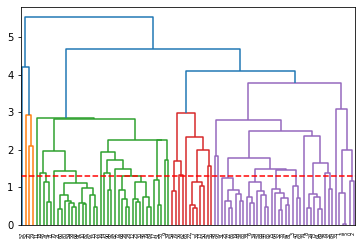

In [65]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
dendrogram_2021 = sch.dendrogram(sch.linkage(norm_data2021, method='ward'))
linkage = sch.linkage(norm_data2021,method='ward',optimal_ordering=True)
plt.axhline(y=1.3, color='r', linestyle='--')

In [94]:
from sklearn.metrics import silhouette_score
plot = []
for i in np.linspace(1.0, 2.5, num=20):
    plot.append([i, silhouette_score(X=norm_data2021,labels=fcluster(linkage,t=i,criterion='distance'))])

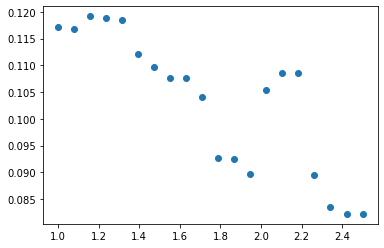

In [95]:
x, y = np.array(plot).T
plt.scatter(x, y)

In [97]:
fcluster(linkage,t=2.1,criterion='distance')

array([ 4,  4,  4,  8,  4,  4,  8, 10,  6, 14, 13, 17, 16, 10, 16, 13, 16,
       15, 13,  8,  1, 13, 13, 16,  6,  8, 16, 10, 16,  1, 16,  8,  8,  5,
        8,  8, 10,  6,  8, 14,  8, 13, 10,  8,  8, 13, 16,  8,  9,  8, 10,
       15,  2, 15, 12, 10, 12,  3, 13, 13, 13,  6, 12,  8,  8, 11, 13, 13,
       16,  6, 13, 13, 16,  6,  7,  8, 12,  8,  6, 16, 13,  8, 13,  8,  6,
        8,  8, 16,  8, 16, 16, 13, 16,  9], dtype=int32)

In [85]:
plot

[[1.0, 0.11709236659299162],
 [1.0545454545454545, 0.1167847981108723],
 [1.1090909090909091, 0.1167847981108723],
 [1.1636363636363636, 0.12246169768735674],
 [1.2181818181818183, 0.11881541440884998],
 [1.2727272727272727, 0.11887059819418667],
 [1.3272727272727274, 0.12044962491930378],
 [1.3818181818181818, 0.11503849577468962],
 [1.4363636363636365, 0.1127082751754139],
 [1.490909090909091, 0.10960226319980387],
 [1.5454545454545454, 0.10960226319980387],
 [1.6, 0.10767853198913159],
 [1.6545454545454548, 0.10513779460528452],
 [1.7090909090909092, 0.10412320308200762],
 [1.7636363636363637, 0.09797469366470515],
 [1.8181818181818183, 0.09261259201677524],
 [1.872727272727273, 0.09244295088436157],
 [1.9272727272727275, 0.09244295088436157],
 [1.981818181818182, 0.11105717541276934],
 [2.0363636363636366, 0.10543695029733435],
 [2.090909090909091, 0.10853513331849506],
 [2.1454545454545455, 0.10853513331849506],
 [2.2, 0.10853513331849506]]

In [ ]:
https://towardsdatascience.com/clustering-analysis-on-stock-selection-2c2fd079b295

In [ ]:
faire du clustering une fois le sharpe calculé? => faire le dataset entier avant de tt faire

restriction sur le GBM et sharpe puis clustering

voir cb il a le poto en silhouette score 

voir des meilleurs clustering

kmeans

pca https://towardsdatascience.com/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e

    
    trouver un attribut secteur directement et faire clustering apres pour selecitonner differents comportements
    https://medium.com/@Nikhilkohli1/extracting-features-for-stock-prediction-streamlit-based-application-a97afc55d926
https://github.com/areed1192/sigma_coding_youtube/blob/master/python/python-data-science/machine-learning/k-means/Clustering%20Stocks%20-%20KMeans.ipynb
    https://www.youtube.com/watch?v=CS9L2QsA4bM
        https://www.youtube.com/watch?v=7_U7tvNZ_JE
            https://www.youtube.com/watch?v=NvuBh3oofL8
                https://towardsdatascience.com/boost-your-time-series-forecasts-combining-gradient-boosting-models-with-prophet-features-8e738234ffd